<a href="https://colab.research.google.com/github/PhDNoe/IA_2023/blob/main/IA_NN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![separador](https://i.imgur.com/4gX5WFr.png)
## Redes Neuronales para clasificación

Vamos a utilizar funcionalidades de las siguientes librerías
* Numpy
* Matplotlib
* Seaborn
* Pandas
* Sklearn
* Keras

![separador](https://i.imgur.com/4gX5WFr.png)

### Notebook de Noe 👻👻
![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



![separador](https://i.imgur.com/4gX5WFr.png)

## Cargamos el dataset desde GitHub, y lo guardamos en un DataFrame

![separador](https://i.imgur.com/4gX5WFr.png)

Vamos a trabajar con un dataset de clasificación binaria. 
Las dos clases de salida son 
* Persona No diabética
* Persona Diabética

#### Los Features son los siguientes:

* **times_pregnant:** Number of times pregnant
* **glucose_concentration:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **Diastolic_pressure:** Diastolic blood pressure (mmHg)
* **Triceps_thickness:** Triceps skind fold thickness (mm)
* **Serum_insulin:** 2-hours serum insulin(mu U/ml)
* **BMI:** Body mass index
* **pedigree_function:** Diabetes pedigree function
* **Age:** Age(years)
* **Class:** 0 (non diabetic) 1 (diabetic)

![separador](https://i.imgur.com/4gX5WFr.png)




In [ ]:
url = "https://raw.githubusercontent.com/NoeliaEch/Datasets/main/indianDiabetes_names.csv"

df = pd.read_csv(url)
df.head()

,times_pregnant,glucose_concentration,Diastolic_pressure,Triceps_thickness,serum_insulin,BMI,pedigree_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


![separador](https://i.imgur.com/4gX5WFr.png)
### Visualizamos las clases

![separador](https://i.imgur.com/4gX5WFr.png)

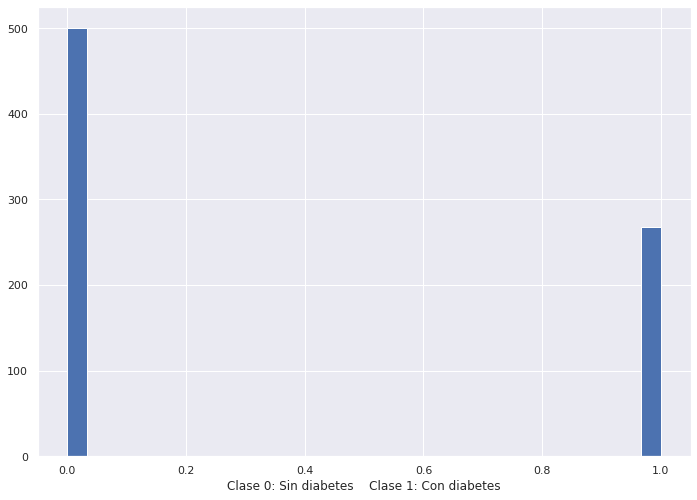

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['Class'], bins=30)
plt.xlabel("Clase 0: Sin diabetes    Clase 1: Con diabetes")
plt.show()

![separador](https://i.imgur.com/4gX5WFr.png)

### Preprocesamiento - HeatMap

![separador](https://i.imgur.com/4gX5WFr.png)

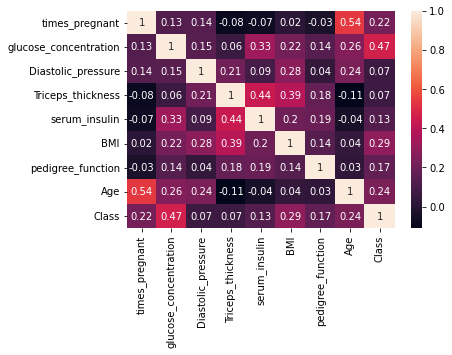

In [ ]:
# Vamos a ver las correlaciones targets y los features
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

![separador](https://i.imgur.com/4gX5WFr.png)

### Separamos en features(X) y target(y)

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
y = df["Class"]
X = df.drop(["Class"], axis=1)
df.head()

,times_pregnant,glucose_concentration,Diastolic_pressure,Triceps_thickness,serum_insulin,BMI,pedigree_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Para mas adelante
yr = df["Class"]  # Resume
Xr = df.drop(["Class"], axis=1)
Xr = Xr[["glucose_concentration", "BMI", "Age"]]

Xr.head()

,glucose_concentration,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


![separador](https://i.imgur.com/4gX5WFr.png)

### Train-test split y escalado

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.1)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)   # Cuidado, se transforma a np.array!!
X_test = scaler.transform(X_test)     # Cuidado, se transforma a np.array!!   

![separador](https://i.imgur.com/4gX5WFr.png)

### Armamos el modelo a entrenar

![separador](https://i.imgur.com/4gX5WFr.png)

Recordar que:

> La función de pérdida (**loss function**) es utilizada para optimizar nuestro modelo. Es la función que será minimizada por el optimizador. <br>

> Una **métrica** (por ejemplo accuracy) es para juzgar la performance del modelo. Sólo se utiliza para "ver" que tan bien lo está haciendo el modelo y no tiene nada que ver con el proceso de optimización.

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
import tensorflow as tf

def creo_modelo(input_dim):
    # Definimos el modelo
    model = Sequential()
    model.add(Dense(20, input_dim=input_dim, activation='relu'))
    model.add(Dense(10, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))  # No es necesario trabajar con softmax por ser solo dos clases
    return model

In [ ]:


model = creo_modelo(8)
model2 = creo_modelo(8)



# Definimos un optimizador para el modelo 1
opt1 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt1, 
              metrics=['sparse_categorical_accuracy'])


# Definimos otro optimizador (para el otro modelo)
opt2 = tf.keras.optimizers.Adam(
    learning_rate=0.002,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt2, 
              metrics=['sparse_categorical_accuracy'])



# Si queremos agregar early stopping se hace a traves de un callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

## Con early Stop
# result = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.2, callbacks=[callback], verbose=1)
# result2 = model2.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2,callbacks=[callback], verbose=1)

# Sin early stop
result = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.2,  verbose=1)
result2 = model2.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2, verbose=1)

print(result.history.keys())

Epoch 1/200
5/5 [==============================] - 1s 57ms/step - loss: 0.8213 - sparse_categorical_accuracy: 0.3424 - val_loss: 0.8006 - val_sparse_categorical_accuracy: 0.3597
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.7980 - sparse_categorical_accuracy: 0.3533 - val_loss: 0.7813 - val_sparse_categorical_accuracy: 0.3957
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.7766 - sparse_categorical_accuracy: 0.3822 - val_loss: 0.7650 - val_sparse_categorical_accuracy: 0.4101
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7582 - sparse_categorical_accuracy: 0.3931 - val_loss: 0.7518 - val_sparse_categorical_accuracy: 0.4173
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7436 - sparse_categorical_accuracy: 0.4293 - val_loss: 0.7392 - val_sparse_categorical_accuracy: 0.4317
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.7300 - sparse_categorical_accuracy: 0

![separador](https://i.imgur.com/4gX5WFr.png)

### Generamos un par de funciones para plotear los resultados

![separador](https://i.imgur.com/4gX5WFr.png)


In [ ]:
def plotLoss(result, extra_title=""):
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(7,7))
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss '+extra_title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Square Error')
    plt.legend()
    plt.show()


def plotAcc(result, extra_title=""):
    acc = result.history['sparse_categorical_accuracy']
    val_acc = result.history['val_sparse_categorical_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(7,7))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation acc '+extra_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

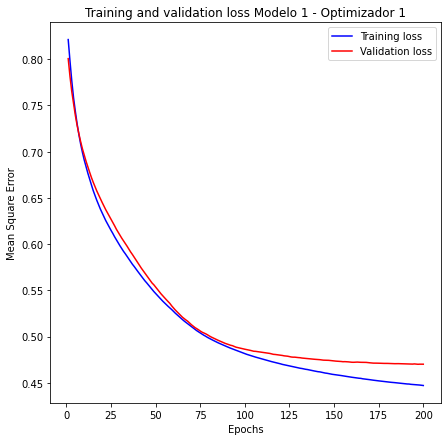

In [ ]:
plotLoss(result, "Modelo 1 - Optimizador 1")


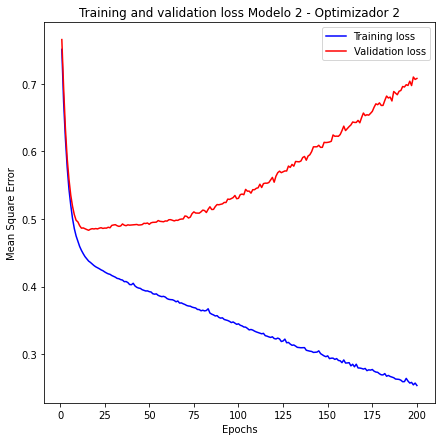

In [ ]:
plotLoss(result2, "Modelo 2 - Optimizador 2")

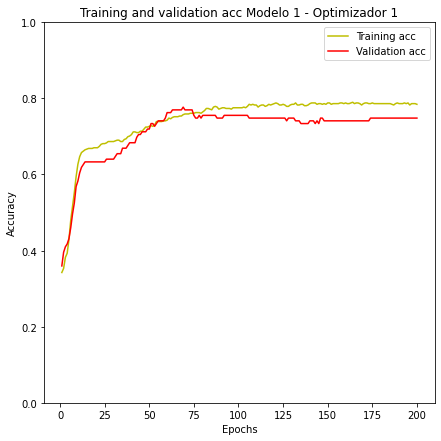

In [ ]:
plotAcc(result, "Modelo 1 - Optimizador 1")

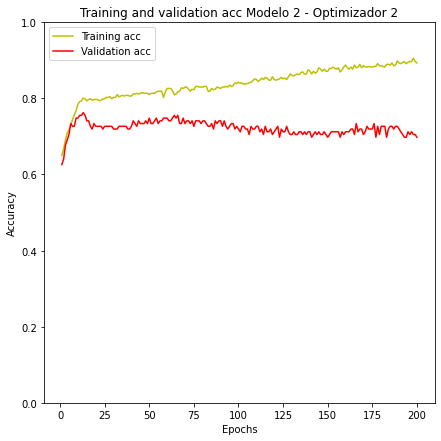

In [ ]:
plotAcc(result2, "Modelo 2 - Optimizador 2")

![separador](https://i.imgur.com/4gX5WFr.png)

### Evaluamos los modelos

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
print("  CONJUNTO DE TEST  ")
print("---------------------------------------------------")
print("Modelo 1 \n")
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

print("\n---------------------------------------------------")
print("Modelo 2 \n")
_, accuracy2 = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy2*100))
print("---------------------------------------------------")

  CONJUNTO DE TEST  
---------------------------------------------------
Modelo 1 

22/22 [==============================] - 0s 1ms/step - loss: 0.4514 - sparse_categorical_accuracy: 0.7771
Accuracy: 77.71

---------------------------------------------------
Modelo 2 

22/22 [==============================] - 0s 1ms/step - loss: 0.3432 - sparse_categorical_accuracy: 0.8567
Accuracy: 85.67
---------------------------------------------------


![separador](https://i.imgur.com/4gX5WFr.png)

### Matrices de confusión

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
from sklearn import metrics

def plot_conf_matrix(results, X, y, extra_title=""):
    cm = metrics.confusion_matrix(y, results)
    print(cm)

    plt.figure(1)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No diabetes','Diabetes'])
    disp.plot() 
    plt.title("Matriz de confusion "+extra_title)
    plt.show()









[[41  7]
 [12 17]]


<Figure size 842.4x595.44 with 0 Axes>

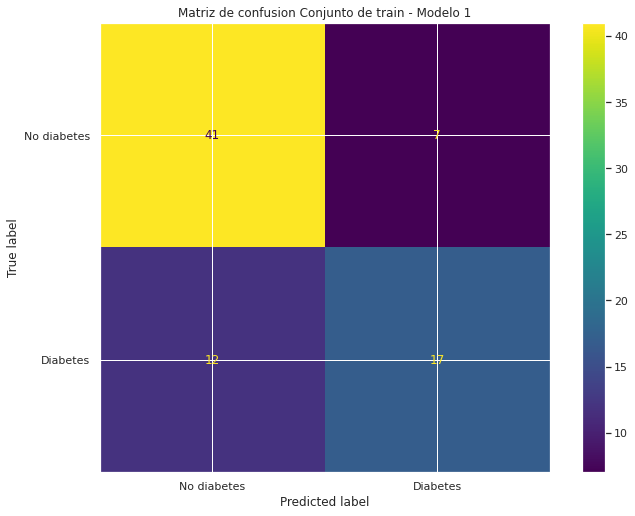

In [ ]:
# Matriz de confusion - modelo 1 - Conjunto de test
pred1 = model.predict(X_test)
res1 = [np.argmax(num) for num in pred1]
plot_conf_matrix(res1, X_test, y_test, "Conjunto de train - Modelo 1")

[[41  7]
 [10 19]]


<Figure size 842.4x595.44 with 0 Axes>

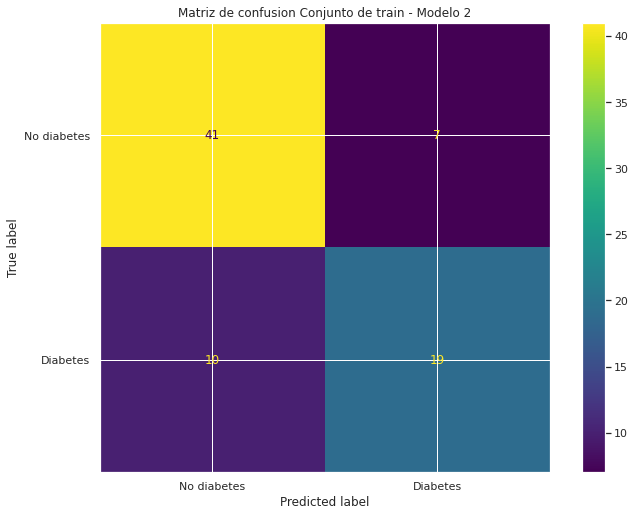

In [ ]:
# Matriz de confusion - modelo 2 - Conjunto de test
pred2 = model2.predict(X_test)
res2 = [np.argmax(num) for num in pred2]
plot_conf_matrix(res2, X_test, y_test, "Conjunto de train - Modelo 2")

![separador](https://i.imgur.com/4gX5WFr.png)

### Meto todo en una mega funcion, que haga todo!!

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
def genero_modelo_y_entreno(X,y, n_opt=1, early=False, epochs=200, bs=128, val_frac=0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.1)

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)   # Cuidado, se transforma a np.array!!
    X_test = scaler.transform(X_test)     # Cuidado, se transforma a np.array!! 
        
    
    model = creo_modelo(X.shape[1])

    if n_opt==1:
        opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
    else:
        opt = tf.keras.optimizers.Adam(
            learning_rate=0.002,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            amsgrad=False,
            name="Adam")
            
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
                    metrics=['sparse_categorical_accuracy'])


    
    if early:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
        result = model.fit(X_train, y_train, epochs=epochs, batch_size=bs, validation_split=val_frac, callbacks=[callback], verbose=1)
        
    else:
        result = model.fit(X_train, y_train, epochs=epochs, batch_size=bs, validation_split=val_frac, verbose=1)
    
    
    print("result.history.keys() = ", result.history.keys())

    plotLoss(result)
    plotAcc(result)

    print("\n---------------------------------------------------")
    print("  CONJUNTO DE TEST  ")
    print("---------------------------------------------------")
    print("Modelo 1 \n")
    _, accuracy = model.evaluate(X_train, y_train)
    print('Accuracy: %.2f' % (accuracy*100))
    print("---------------------------------------------------")

    pred = model.predict(X_test)
    res = [np.argmax(num) for num in pred]
    plot_conf_matrix(res, X_test, y_test)

Epoch 1/400
8/8 [==============================] - 0s 25ms/step - loss: 0.7390 - sparse_categorical_accuracy: 0.3023 - val_loss: 0.7197 - val_sparse_categorical_accuracy: 0.3654
Epoch 2/400
8/8 [==============================] - 0s 8ms/step - loss: 0.7091 - sparse_categorical_accuracy: 0.4451 - val_loss: 0.6971 - val_sparse_categorical_accuracy: 0.5240
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 0.6863 - sparse_categorical_accuracy: 0.5983 - val_loss: 0.6792 - val_sparse_categorical_accuracy: 0.6202
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 0.6680 - sparse_categorical_accuracy: 0.6542 - val_loss: 0.6652 - val_sparse_categorical_accuracy: 0.6635
Epoch 5/400
8/8 [==============================] - 0s 8ms/step - loss: 0.6531 - sparse_categorical_accuracy: 0.6729 - val_loss: 0.6537 - val_sparse_categorical_accuracy: 0.6635
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6403 - sparse_categorical_accuracy: 0.683

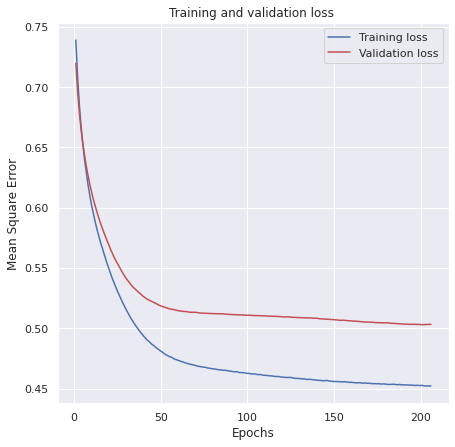

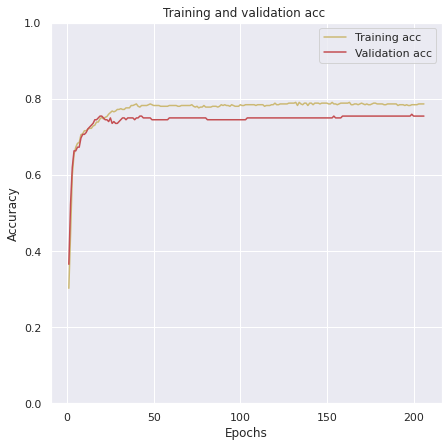


---------------------------------------------------
  CONJUNTO DE TEST  
---------------------------------------------------
Modelo 1 

22/22 [==============================] - 0s 2ms/step - loss: 0.4673 - sparse_categorical_accuracy: 0.7771
Accuracy: 77.71
---------------------------------------------------
[[43  5]
 [12 17]]


<Figure size 842.4x595.44 with 0 Axes>

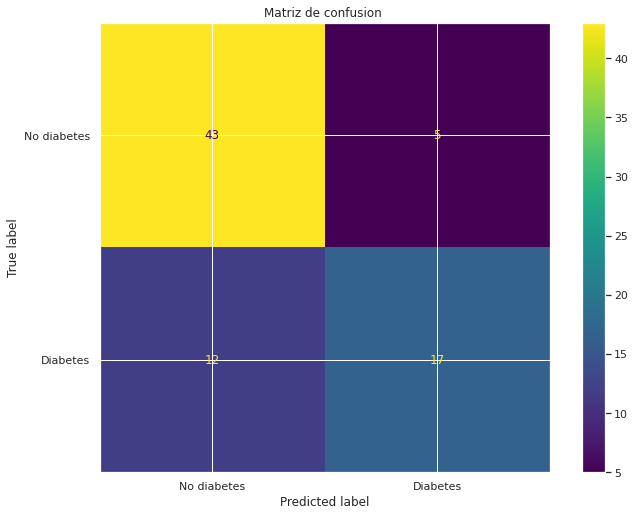

In [ ]:
genero_modelo_y_entreno(Xr,yr, n_opt=1, early=True, epochs=400, bs=64, val_frac=0.3)